In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
import uproot as up

In [53]:
ff = up.open("QuadraticAndGaussian_mcmc.root")
ff.keys()

In [14]:
ff['QuadraticAndGaussian_mcmc'].keys()

['Chain',
 'Iteration',
 'Phase',
 'LogProbability',
 'a',
 'b',
 'c',
 'A',
 'LogLikelihood',
 'LogPrior',
 'LogLikelihood',
 'LogPrior']

In [16]:
ff['QuadraticAndGaussian_parameters'].keys()

['parameter',
 'index',
 'name',
 'safe_name',
 'latex_name',
 'unit_string',
 'lower_limit',
 'upper_limit',
 'precision',
 'nbins',
 'fill_1d',
 'fill_2d',
 'fixed',
 'fixed_value',
 'nchains',
 'scale',
 'efficiency_0']

In [33]:
ff['QuadraticAndGaussian_mcmc']['b'].array()

<Array [0.05, 0.05, 0.05, ..., -0.0398, -0.0357] type='305500 * float64'>

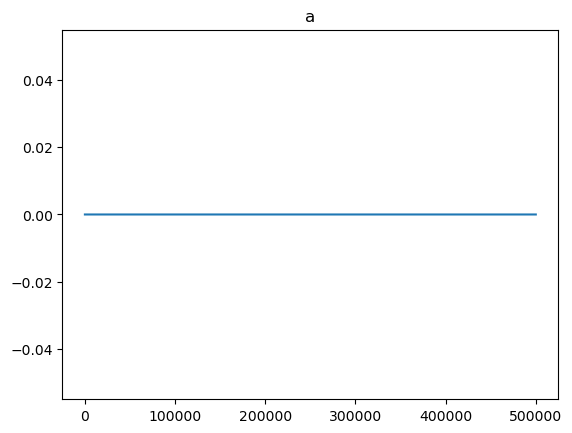

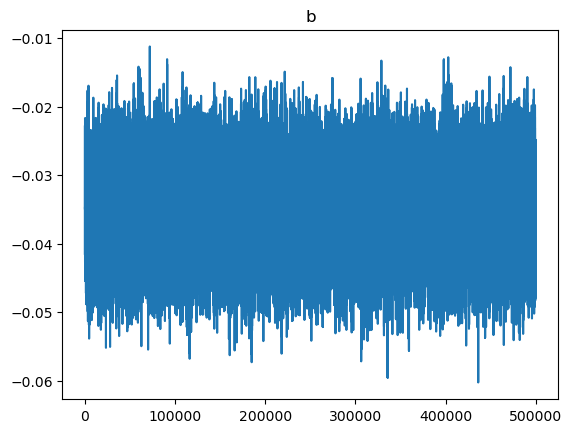

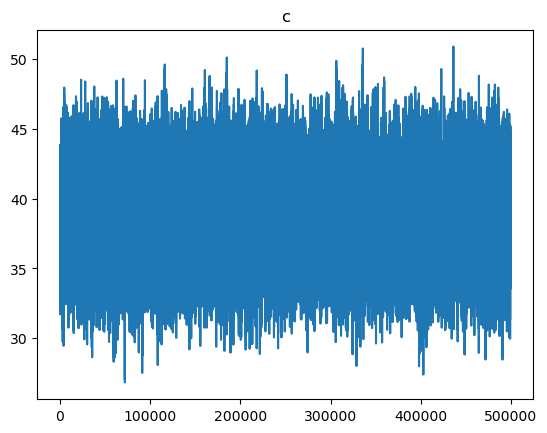

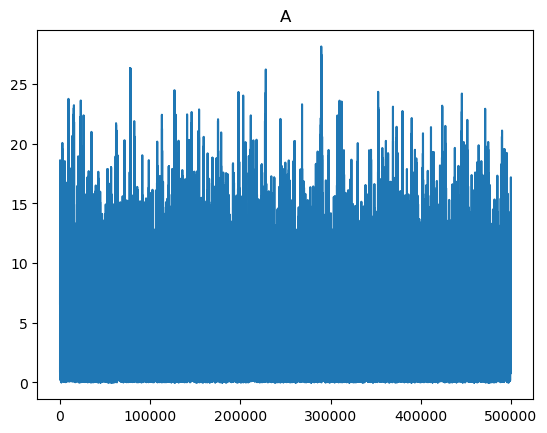

In [56]:
chains = []
for param in ['a', 'b', 'c', 'A']:
    c = ff['QuadraticAndGaussian_mcmc'][param].array()

    phase = ff['QuadraticAndGaussian_mcmc']['Phase'].array()
    
    c = c[phase > 0]
    
    chains.append(c)
    
    x = np.arange(0, len(c))
    plt.plot(x, c)
    plt.title(f'{param}')
    plt.show()


In [80]:
a = ff['QuadraticAndGaussian_mcmc']['a'].array().to_numpy()
b = ff['QuadraticAndGaussian_mcmc']['b'].array().to_numpy()
c = ff['QuadraticAndGaussian_mcmc']['c'].array().to_numpy()
A = ff['QuadraticAndGaussian_mcmc']['A'].array().to_numpy()

phase = ff['QuadraticAndGaussian_mcmc']['Phase'].array()

a = a[phase > 0].flatten()
b = b[phase > 0].flatten()
c = c[phase > 0].flatten()
A = A[phase > 0].flatten()

data = np.stack([b, c, A], axis=1)

In [81]:
np.shape(data)

(500000, 3)

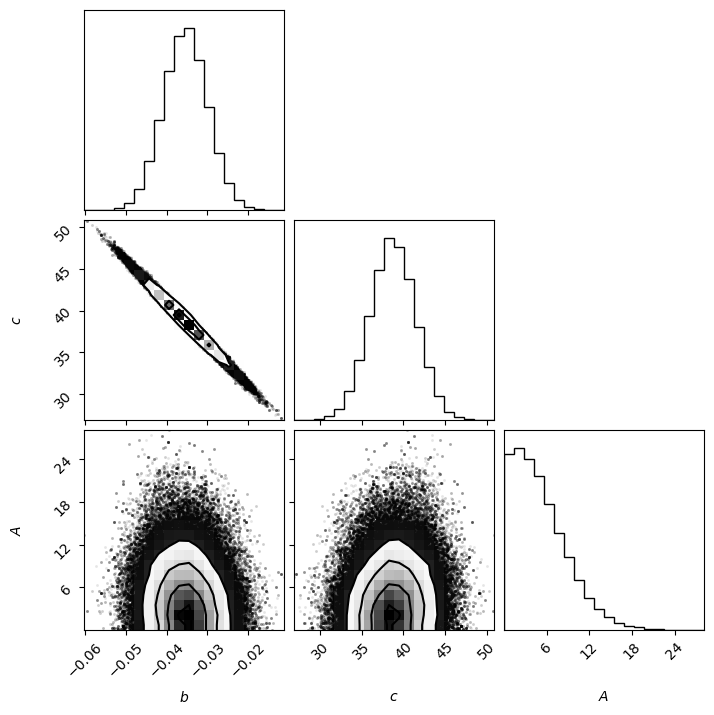

In [82]:
figure = corner.corner(
        data,
        labels=[
            r"$b$",
            r"$c$",
            r"$A$",
        ],
    #     quantiles=[0.16, 0.5, 0.84],
    #     show_titles=True,
        title_kwargs={"fontsize": 12},
    )


## Schifezza da cui copiare

In [ ]:
cornerRf     = df[set_run(df)]['r_f']
cornerRFe    = df[set_run(df)]['r_Fe']
cornerRS     = df[set_run(df)]['r_s']
cornerRl     = df[set_run(df)]['r_l']
cornerEpsilon     = df[set_run(df)]['epsilon']
cornerSigma     = df[set_run(df)]['sigma_res']





samples = np.array(np.transpose(np.vstack([cornerRf,cornerRFe,cornerRS,cornerRl,cornerEpsilon,cornerSigma ])))


figure = corner.corner(samples,
                       labels=['$r_f$','$r_{Fe}$','$r_s$','$r_l$','$\epsilon$','$\sigma_{res}$'],
                       show_titles=True,quantiles=[0.16, 0.5, 0.84],
                       title_kwargs={"fontsize": 18},label_kwargs={"fontsize": 20})
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.suptitle("Corner Plot for mass = %.2f GeV"%m, fontsize=16, y=1.02)
axes = np.array(figure.axes).reshape((6, 6))
corrcoef = np.corrcoef(samples, rowvar=False)
for i in range(6):
    for j in range(6):
        if j > i:
            # Determine position for inserting text
            x = (axes[i, j].get_xlim()[0] + axes[i, j].get_xlim()[1])*0.5
            y = (axes[i, j].get_ylim()[0] + axes[i, j].get_ylim()[1])*0.5
            # Insert text
            axes[i, j].text(x, y, f' {corrcoef[i, j]:.2f}' ,
                            horizontalalignment='center',verticalalignment='center', fontsize=20, color='black')
# plt.savefig('posteriors_1e-40.png',format='png')
plt.show()

In [39]:
import corner

plt.rcParams.update({'font.size': 10})

def CorrelationPlot3(sample, filename = './plot.pdf', **kwargs):
    names = list(sample.keys())[:4]
    
#     pars_n = [r'$r_S$',
#           r'$r_B^{Ar}$', r'$r_B^{Kr}$', r'$r_B^{PMT}$', r'$r_B^{Cryo}$', r'$a_0$', r'$a_1$', r'$a_2$',
#           r'$a_3$', r'$C_{box}^{NR}$',
#           r'$f_B$', r'$\sigma_{scr}^{Ar}$', r'$\sigma_{scr}^{Kr}$',
#           r'$\sigma_{Q}^{Ar}$', r'$\sigma_{Q}^{Kr}$', r'$\mathcal{E}$ / $\mathcal{E}_{DS}$'
#     ]
    pars_n = ['a', 'b', 'c', 'A']

    sample_m = {}
    
    for name in names:
        chain = np.array(sample[name])
        sample_m[name] = chain
            
    tmp = np.expand_dims(sample_m[names[0]], axis = 0)
    for i in range(1,len(names)):
        tmp = np.concatenate((tmp, np.expand_dims(sample_m[names[i]], axis=0)), axis = 0)
    samples = np.transpose(tmp)

    corr = np.corrcoef(np.transpose(samples))
    plt.rcParams.update({'font.size': 10,
                         'axes.labelsize': 20,
                         'axes.titlesize': 10
                        })
    
    fig = corner.corner(samples,
                        labels = pars_n,
                        show_titles=False, title_kwargs={"fontsize": 30}, title_fmt='.3f',
                        quantiles = [abs(0.5-0.683/2), 0.5+0.683/2],
                        **kwargs
                       )

    values = np.mean(samples, axis=0)

    # Extract the axes
    ndim = len(names)
    axes = np.array(fig.axes).reshape((ndim, ndim))
    for i in range(ndim-1):
        for j in range(ndim):
            if (j>i):
                ax = axes[i, j]
                ax.text(0.5, 0.5,
                        #r"$\rho$"+" ("+names[i]+", "+names[j]+") = "
                        "{0:.2f}".format(corr[i, j]),
                        verticalalignment='center', horizontalalignment='center', fontsize = 40)
    #print("Pippo")
    plt.savefig(filename, bbox_inches="tight")

In [49]:
    fig = corner.corner(chains,
#                         labels = pars_n,
                        show_titles=False, title_kwargs={"fontsize": 30}, title_fmt='.3f',
                        quantiles = [abs(0.5-0.683/2), 0.5+0.683/2],
#                         **kwargs
                       )


ValueError: Can only convert xarray dataarray, xarray dataset, dict, netcdf filename, numpy array, pystan fit, emcee fit, pyro mcmc fit, numpyro mcmc fit, cmdstan fit csv filename, cmdstanpy fit to InferenceData, not list

In [48]:
CorrelationPlot3(chains, filename = './4plot_test.pdf',
                levels=(0.68, 0.95, 0.997), figsize = (20,20)
                , range = [[-0.04], []]
                )

NameError: name 'ranges' is not defined

In [2]:
#file_dir = "../../../lowmass-bat-git/results/4-180_pseudodata_NRmig_central_statonly_4.52_100000/"
Niter = "100000"
# m = '4.52'
# nmin = '4.000000'
# nmax = '170.000000'
#m = '0.221'
#m = '0.924'
# file_dir = "../results/"+nmin+"-"+nmax+"_0829_expected_"+m+"_"+Niter+"0/"
#file_dir = "../results/short_expected_runs/4.000000-170.000000_0829_expected_10.0_120000/"

# file_dir = '~/workspace/cygno/LIMEPMTfits/test_francesco/LNGS_fit/da_plottare/'
file_dir = '~/tmp/'

file = ROOT.TFile.Open(file_dir + "prova_mcmc_cal.root", "READ")#"different_cal_lowmass_mcmc.root" ,"READ")

signal = True

mctree = file.standard_parameters #different_cal_lowmass_parameters

#mctree.Print()
#print("Parameters:")

par_name = np.array([])
for ev in mctree:
    tmp = ev.nbins
for ev in mctree:
    par_name = np.append(par_name, ev.name)
    #print("  ", ev.name)

mctree = file.standard_mcmc#different_cal_lowmass_mcmc

#mctree.Print()

mctree.GetBranch("Chain").SetName("chain")
mctree.GetBranch("Iteration").SetName("iteration")
mctree.GetBranch("Phase").SetName("phase")
mctree.GetBranch("LogProbability").SetName("log_probability")
mctree.GetBranch("LogPrior").SetName("log_prior")
mctree.GetBranch("LogLikelihood").SetName("log_likelihood")
mctree.GetBranch("LogPrior").SetName("log_prior")
mctree.GetBranch("LogLikelihood").SetName("log_likelihood")

nptree = mctree.AsMatrix()

#nptree.shape

phase = np.transpose(nptree)[2]

chains = {}
for i, par in enumerate(par_name):
    #chains[par.split('\x00x')[0]] = np.transpose(nptree)[4+i][np.where(phase == 1)]
    chains[par.split('\x00')[0]] = np.transpose(nptree)[4+i][np.where(phase == 1)]

NameError: name 'ROOT' is not defined

In [48]:
ranges = [(1900, 2060), (12.7, 16), (17.5, 21)]

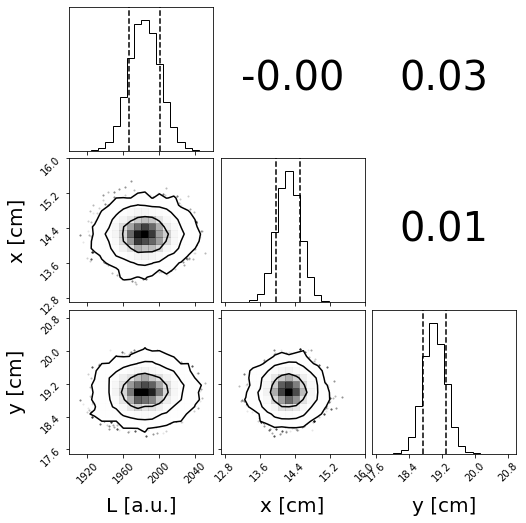

In [49]:
CorrelationPlot3(chains, filename = './4plot_test.pdf',
                levels=(0.68, 0.95, 0.997), figsize = (20,20)
                , range = ranges
                )

In [6]:
xx = np.array([])

for i in range(100000):
    xx = np.append(xx, np.random)

In [9]:
plt.hist(np.sqrt(xx))

TypeError: loop of ufunc does not support argument 0 of type module which has no callable sqrt method

In [16]:
(0.95*0.1)/(0.95*0.1+0.02*0.9)

0.8407079646017699

In [17]:
(0.95*0.1)/(0.02*0.9)

5.277777777777777

In [13]:
(2/3*1/2 + 1/3)/(1/3+1/6)

1.3333333333333333

In [11]:
1*(0.45)/(0.45 + 2/1000 * 0.55)

0.9975615162935048

In [10]:
xx

array([<module 'numpy.random' from '/opt/homebrew/anaconda3/envs/Legend/lib/python3.9/site-packages/numpy/random/__init__.py'>,
       <module 'numpy.random' from '/opt/homebrew/anaconda3/envs/Legend/lib/python3.9/site-packages/numpy/random/__init__.py'>,
       <module 'numpy.random' from '/opt/homebrew/anaconda3/envs/Legend/lib/python3.9/site-packages/numpy/random/__init__.py'>,
       ...,
       <module 'numpy.random' from '/opt/homebrew/anaconda3/envs/Legend/lib/python3.9/site-packages/numpy/random/__init__.py'>,
       <module 'numpy.random' from '/opt/homebrew/anaconda3/envs/Legend/lib/python3.9/site-packages/numpy/random/__init__.py'>,
       <module 'numpy.random' from '/opt/homebrew/anaconda3/envs/Legend/lib/python3.9/site-packages/numpy/random/__init__.py'>],
      dtype=object)

In [8]:
import matplotlib.pyplot as plt

In [10]:
file_dir = '/data11/cygno/piacenst/cygno/LIMEPMTfits/test_francesco/LNGS_fit/da_plottare/'

file = ROOT.TFile.Open(file_dir + "standard_mcmc.root", "READ")#"different_cal_lowmass_mcmc.root" ,"READ")


In [17]:
import uproot as up

In [18]:
file = up.open(file_dir+"standard_mcmc.root")

In [20]:
file.keys()

['standard_parameters;3', 'standard_mcmc;15']

In [26]:
chains.keys()

dict_keys(['L', 'x_2', 'y_2', 'c1', 'c2', 'c3', 'c4'])